# The observed circulation

... work in progress.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

## The CFSR climatology datasets

We pre-computed 30-year seasonal and monthly climatologies from the 6-hourly CFSR dataset, see [Computing seasonal and monthly means from CFSR data](computing-seasonal.html).

Here we'll use those datasets to make some nice reference figures.

In [2]:
local_path = '/nfs/roselab_rit/data/cfsr_climatology/'

path = local_path

Load the seasonal data:

In [3]:
cfsr_seas = xr.open_mfdataset(path + '*' + '.seas_clim.0p5.nc')
cfsr_seas

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 720, lev: 40, season: 4)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lev      (lev) float32 -2e-06 2e-06 10.0 20.0 ... 925.0 950.0 975.0 1e+03
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    g        (season, lev, lat, lon) float32 dask.array<chunksize=(4, 40, 361, 720), meta=np.ndarray>
    pmsl     (season, lat, lon) float32 dask.array<chunksize=(4, 361, 720), meta=np.ndarray>
    pwat     (season, lat, lon) float32 dask.array<chunksize=(4, 361, 720), meta=np.ndarray>
    q        (season, lev, lat, lon) float32 dask.array<chunksize=(4, 40, 361, 720), meta=np.ndarray>
    t        (season, lev, lat, lon) float32 dask.array<chunksize=(4, 40, 361, 720), meta=np.ndarray>
    tsfc     (season, lat, lon) float32 dask.array<chunksize=(4, 361, 720), meta=np.ndarray>
    u        (season, lev, lat, lon) float32 dask.array<chunksize=(4, 40, 361, 720), meta=np.ndarray>
    v        (season, lev, lat, lon) float32 dask.array<chunksize=(4, 40, 361, 720), meta=np.ndarray>
    w        (season, lev, lat, lon) float32 dask.array<chunksize=(4, 40, 361, 720), meta=np.ndarray>

and the monthly data:

In [4]:
cfsr_mon = xr.open_mfdataset(path + '*' + '.mon_clim.0p5.nc')
cfsr_mon

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 720, lev: 40, month: 12)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lev      (lev) float32 -2e-06 2e-06 10.0 20.0 ... 925.0 950.0 975.0 1e+03
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    g        (month, lev, lat, lon) float32 dask.array<chunksize=(12, 40, 361, 720), meta=np.ndarray>
    pmsl     (month, lat, lon) float32 dask.array<chunksize=(12, 361, 720), meta=np.ndarray>
    pwat     (month, lat, lon) float32 dask.array<chunksize=(12, 361, 720), meta=np.ndarray>
    q        (month, lev, lat, lon) float32 dask.array<chunksize=(12, 40, 361, 720), meta=np.ndarray>
    t        (month, lev, lat, lon) float32 dask.array<chunksize=(12, 40, 361, 720), meta=np.ndarray>
    tsfc     (month, lat, lon) float32 dask.array<chunksize=(12, 361, 720), meta=np.ndarray>
    u        (month, lev, lat, lon) float32 dask.array<chunksize=(12, 40, 361, 720), meta=np.ndarray>
    v        (month, lev, lat, lon) float32 dask.array<chunksize=(12, 40, 361, 720), meta=np.ndarray>
    w        (month, lev, lat, lon) float32 dask.array<chunksize=(12, 40, 361, 720), meta=np.ndarray>

## Sea level pressure

For many fields, we will make three individual plots:

- annual mean
- DJF
- JJA

Here's an example for the sea level pressure. I'm choosing a particular map projection here. There are lots of other choices, see [the Cartopy documentation](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

Text(0.5, 1.0, 'JJA')

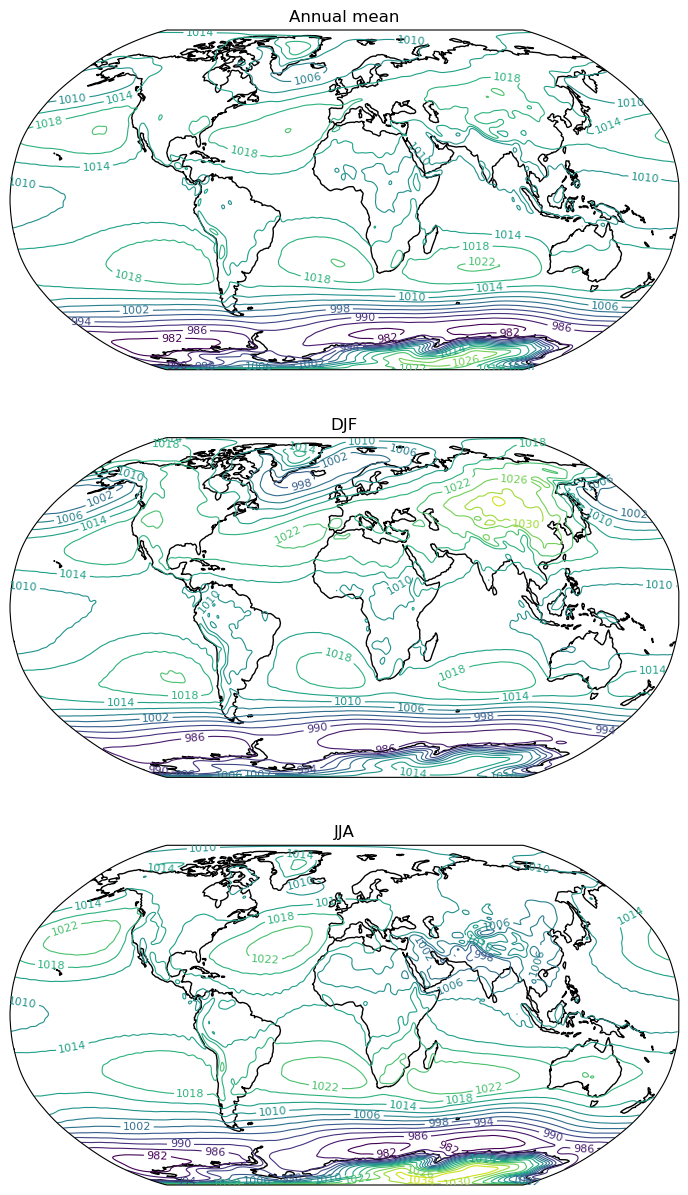

In [6]:
lon = cfsr_seas.lon
lat = cfsr_seas.lat

levels = np.arange(982., 1040., 4.)

fig, axes = plt.subplots(3, figsize=(10,15), subplot_kw={'projection': ccrs.Robinson()})

for ax in axes:
    ax.coastlines()
    
ax = axes[0]
CS = ax.contour(lon, lat, cfsr_seas.pmsl.mean(dim='season') / 100., levels=levels, linewidths=0.8, 
               transform=ccrs.PlateCarree())
ax.clabel(CS, CS.levels, inline=True, fontsize=8)
ax.set_title('Annual mean')

ax = axes[1]
CS = ax.contour(lon, lat, cfsr_seas.pmsl.sel(season='DJF') / 100., levels=levels, linewidths=0.8, 
               transform=ccrs.PlateCarree())
ax.clabel(CS, CS.levels, inline=True, fontsize=8)
ax.set_title('DJF')

ax = axes[2]
CS = ax.contour(lon,lat, cfsr_seas.pmsl.sel(season='JJA') / 100., levels=levels, linewidths=0.8, 
               transform=ccrs.PlateCarree())
ax.clabel(CS, CS.levels, inline=True, fontsize=8)
ax.set_title('JJA')

## List of figures

The following figures appear in the slide deck we saw in class, [which you can find at this link](https://www.atmos.albany.edu/facstaff/tang/classes/atm622/Lecture2.pdf) (courtesy of [Professor Brian Tang](https://www.atmos.albany.edu/facstaff/tang/index.html), University at Albany).

Our objective here is to build recipes to make all (or at least most of) these figures from the CFSR climatology.

1. SLP *this one is already done*
    - annual mean
    - DJF
    - JJA
1. 1000 hPa streamlines 
    - annual mean
    - DJF
    - JJA
1. 1000 hPa zonal wind
    - annual mean
    - DJF
    - JJA
1. 1000 hPa meridional wind
    - annual mean
    - DJF
    - JJA
1. 1000 hPa temperature
    - annual mean
1. 1000 hPa zonal temperature anomaly
    - DJF
    - JJA
1. 200 hPa streamlines
    - annual mean
    - DJF
    - JJA
1. 200 hPa zonal wind
    - annual mean
    - DJF
    - JJA
1. 200 hPa meridional wind
    - annual mean
    - DJF
    - JJA
1. 500 hPa vertical velocity (omega)
    - annual mean
    - DJF
    - JJA
1. 500 hPa relative humidity
    - annual mean
    - DJF
    - JJA
1. 850 hPa moist static energy
    - annual mean
1. 850 hPa moist static energy zonal anomaly
    - DJF
    - JJA
1. Surface enthalpy flux
    - annual mean
    - DJF
    - JJA
1. Schematic: Lagrangian vs Eulerian overturning

## Overturning circulation

An element of northward mass flux (in units of kg s${^-1}$) across latitude line $\phi$ is

$$ d\psi = a \cos\phi d\lambda ~ v ~ \frac{dp}{g} $$

So the total northward mass flux across $\phi$ above pressure level $p$ is given by

\begin{align*} 
\psi(p) &= \int_0^{2\pi} \int_0^p a \cos\phi d\lambda ~ v ~ \frac{dp}{g} \\
&= 2\pi a \frac{\cos\phi}{g} \int_0^p [v] dp 
\end{align*}

Th zonally- and time-averaged mass conservation in pressure coordinates is

$$ \frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} \left( [\overline{v}] \cos\phi \right) + \frac{\partial [\overline{\omega}]}{\partial p} = 0 $$

In other words, the vector with components $[\overline{v}], [\overline{\omega}]$ is non-divergent. So we can represent it with a scalar streamfunction $\psi, the **mass transport streamfunction**:

\begin{align*}
2\pi a \cos\phi [\overline{v}] &= \frac{\partial \psi}{\partial p} \\
2\pi a^2 \cos\phi \left( [\overline{\omega}]\right) = -\frac{\partial \psi}{\partial \phi}
\end{align*}

consistent with the definition of $\psi$ above!

It it thus possible to compute and plot the mass streamfunction from just the zonal wind data, using

$$ \psi = \frac{2\pi a \cos\phi}{g} \int_0^p [\overline{v}] dp $$